In [ ]:
!pip install roerich

In [1]:
import roerich
from roerich.change_point import OnlineNNClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%cd /content/drive/MyDrive/Research/onlineCPD

/content/drive/MyDrive/Research/onlineCPD


In [3]:

data_use = "s2"
dim_d = 10

#########
# NO CP #
#########
data_C = np.load('data/data_{}_d{}_C.npz'.format(data_use, dim_d))
print(data_C['y_list'].shape)


(100, 100, 10)


In [22]:


threshold_holder = []

for seq_iter in range(100):

    print("[INFO] seq_iter =", seq_iter)
    X = data_C['y_list'][seq_iter]

    cpd = OnlineNNClassifier(periods=1, window_size=3, lag_size=1, step=1,
                         n_epochs=5, lr=0.01, lam=0.0001, optimizer="Adam")
    score, cps_pred = cpd.predict(X)
    #print(score, cps_pred)

    #plt.plot(score)
    #plt.xlabel("Index"); plt.ylabel("Value")
    #plt.show()

    threshold_holder.append(max(score).item())
    print("[INFO] threshold_holder:", threshold_holder)

    df = pd.DataFrame(threshold_holder, columns=['Threshold'])
    df.to_csv('data/threshold_roerich_{}_d{}.csv'.format(data_use, dim_d), index=False)




[INFO] seq_iter = 0
[INFO] threshold_holder: [0.0015891374860484532]
[INFO] seq_iter = 1
[INFO] threshold_holder: [0.0015891374860484532, 0.16580224326678683]
[INFO] seq_iter = 2
[INFO] threshold_holder: [0.0015891374860484532, 0.16580224326678683, 0.05182631662913731]
[INFO] seq_iter = 3
[INFO] threshold_holder: [0.0015891374860484532, 0.16580224326678683, 0.05182631662913731, 0.5409571208272661]
[INFO] seq_iter = 4
[INFO] threshold_holder: [0.0015891374860484532, 0.16580224326678683, 0.05182631662913731, 0.5409571208272661, 0.30901726620537895]
[INFO] seq_iter = 5
[INFO] threshold_holder: [0.0015891374860484532, 0.16580224326678683, 0.05182631662913731, 0.5409571208272661, 0.30901726620537895, 0.04526252871467954]
[INFO] seq_iter = 6
[INFO] threshold_holder: [0.0015891374860484532, 0.16580224326678683, 0.05182631662913731, 0.5409571208272661, 0.30901726620537895, 0.04526252871467954, 0.04147795313880557]
[INFO] seq_iter = 7
[INFO] threshold_holder: [0.0015891374860484532, 0.165802243

In [23]:
###########
# WITH CP #
###########
data_full = np.load('data/data_{}_d{}.npz'.format(data_use, dim_d))
print(data_full['y_list'].shape)


df = pd.read_csv('data/threshold_roerich_{}_d{}.csv'.format(data_use, dim_d))
print("[INFO] df.shape:",df.shape)
C_by_quantile = np.percentile(df, 95)
print(f"selected quantile: {C_by_quantile}")



(50, 100, 10)
[INFO] df.shape: (100, 1)
selected quantile: 0.34007466764428773



[INFO] seq_iter = 0
[INFO] cps_pred: [ 1 12 20 32 40 51 65 73 86 98]


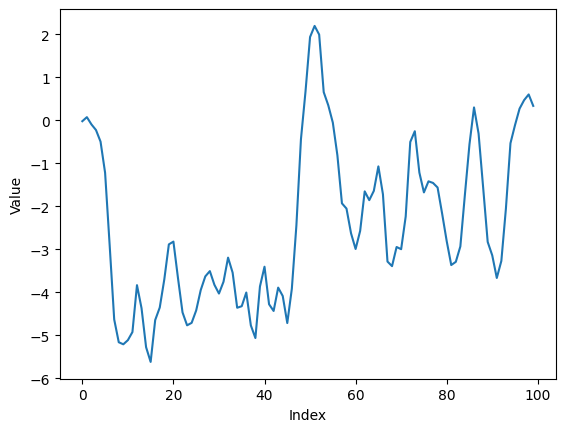


[INFO] seq_iter = 1
[INFO] cps_pred: [ 1 18 25 34 51 67 78 88 98]


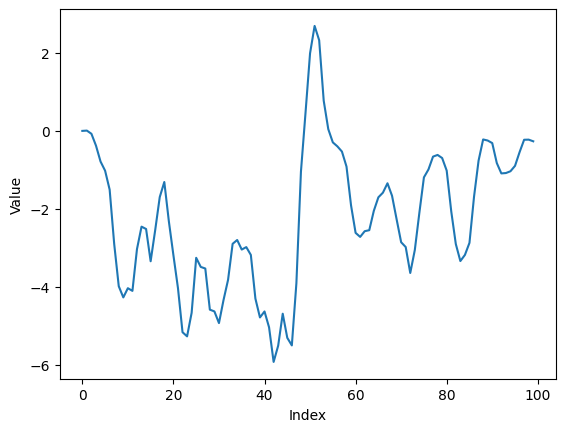


[INFO] seq_iter = 2
[INFO] cps_pred: [ 1 15 28 35 50 65 73 85 90]


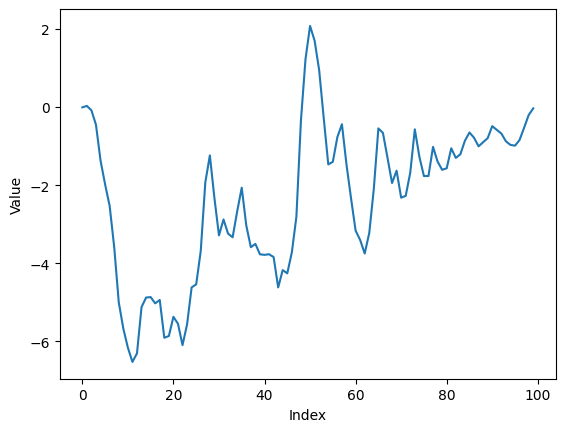


[INFO] seq_iter = 3
[INFO] cps_pred: [ 2 24 33 51 75 82]


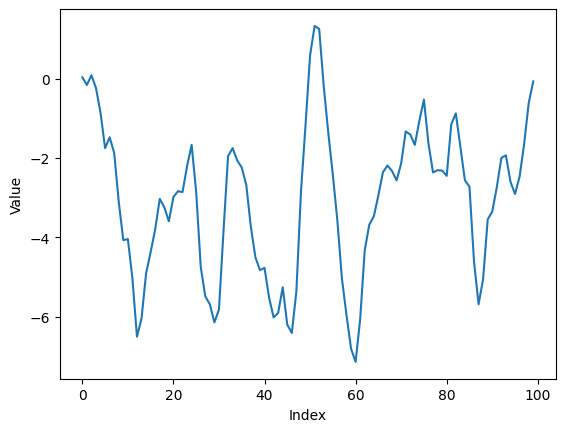


[INFO] seq_iter = 4
[INFO] cps_pred: [ 1  9 19 29 37 53 63 77 83 98]


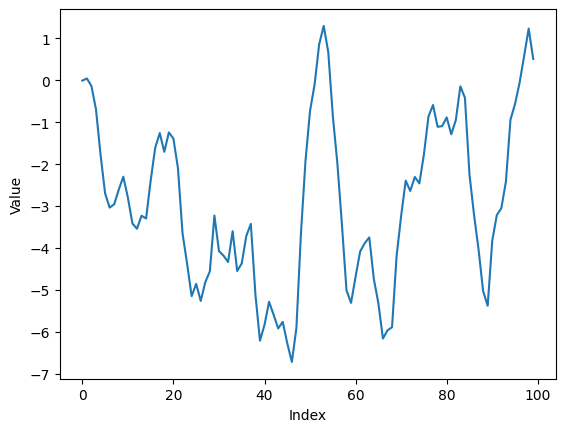


[INFO] seq_iter = 5
[INFO] cps_pred: [ 1 18 30 38 49 65 75 87]


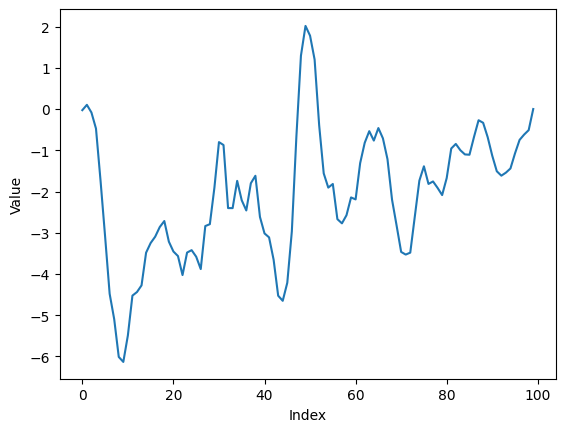


[INFO] seq_iter = 6
[INFO] cps_pred: [15 29 40 52 59 66 77 87]


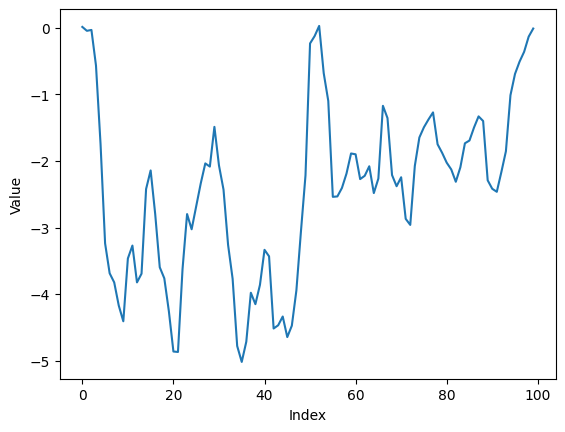


[INFO] seq_iter = 7
[INFO] cps_pred: [ 2 24 35 42 51 60 66 72 85 98]


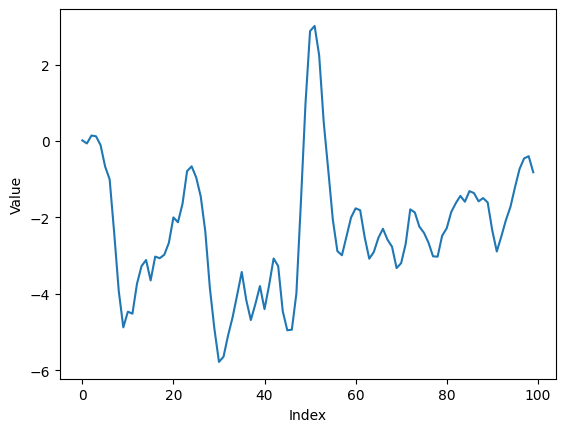


[INFO] seq_iter = 8
[INFO] cps_pred: [ 1 18 25 33 50 63 75]


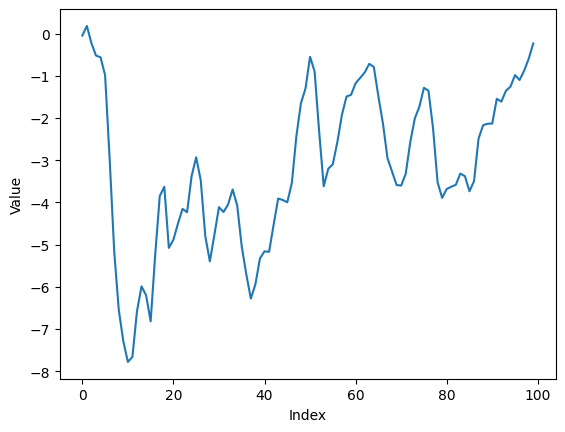


[INFO] seq_iter = 9
[INFO] cps_pred: [ 2 19 32 41 51 66 81]


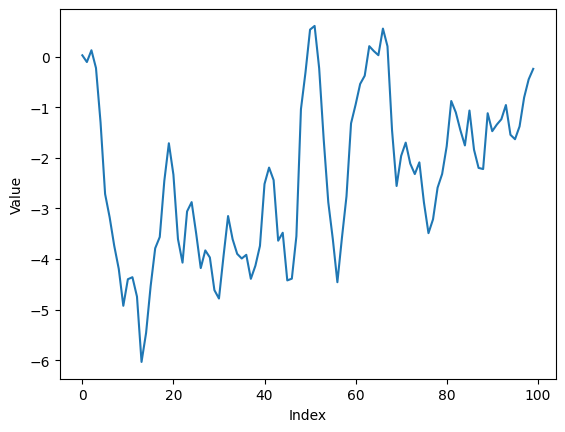


[INFO] seq_iter = 10
[INFO] cps_pred: [ 1 18 28 51 63 70 77 92 98]


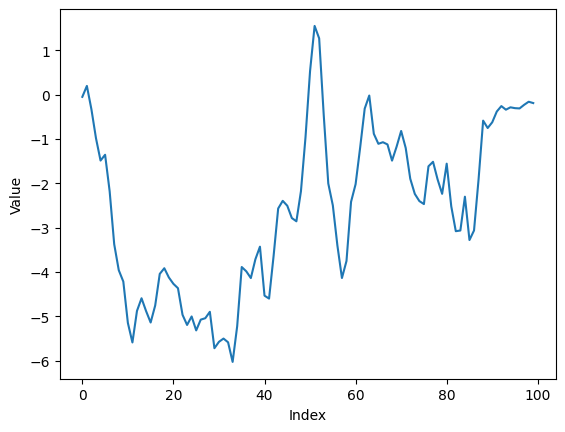


[INFO] seq_iter = 11
[INFO] cps_pred: [ 3 14 22 35 50 57 69 77 89 98]


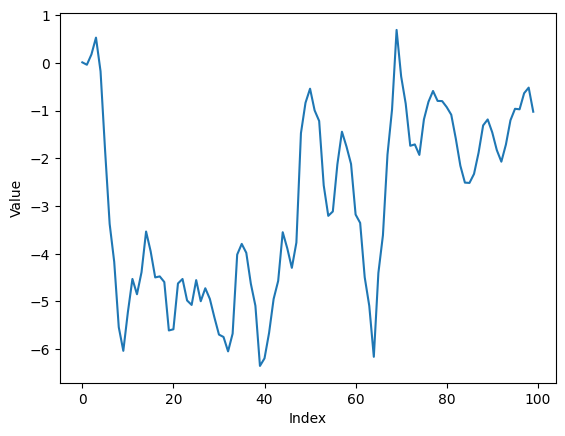


[INFO] seq_iter = 12
[INFO] cps_pred: [ 4 12 28 54 63 76 87]


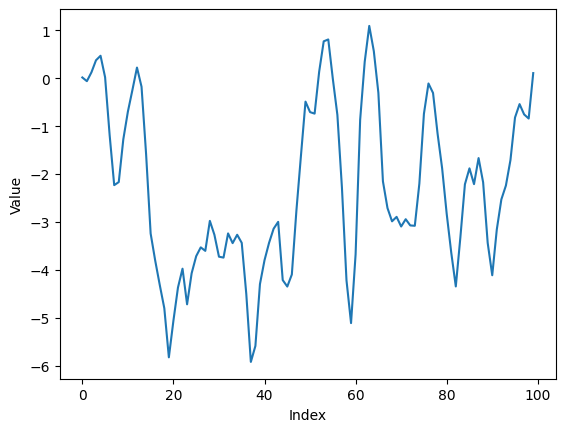


[INFO] seq_iter = 13
[INFO] cps_pred: [ 2 15 25 49 59 71 84]


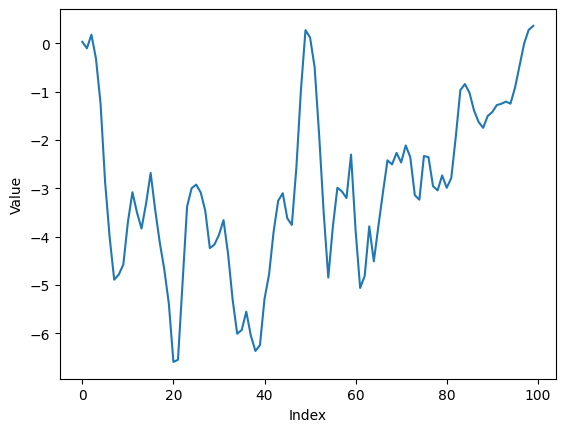


[INFO] seq_iter = 14
[INFO] cps_pred: [ 3 14 26 41 49 76 89 95]


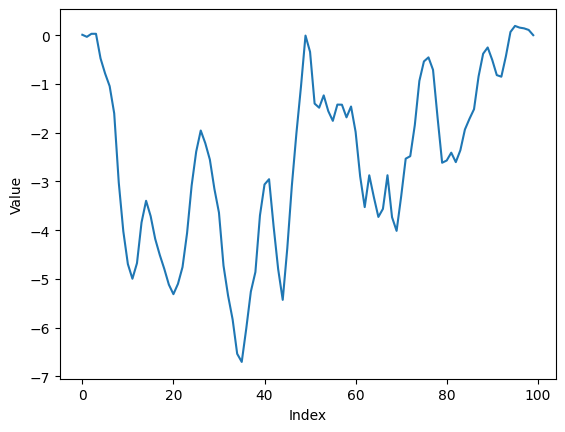


[INFO] seq_iter = 15
[INFO] cps_pred: [ 2 22 30 52 61 71 79 96]


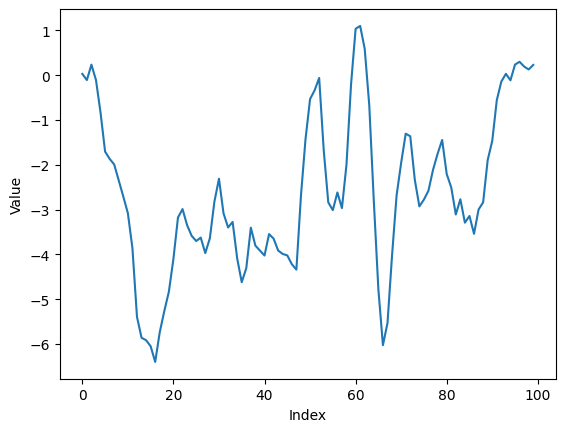


[INFO] seq_iter = 16
[INFO] cps_pred: [ 2 14 27 35 51 63 78 91]


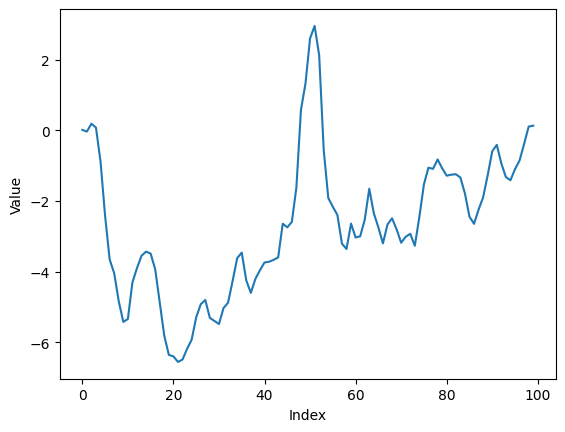


[INFO] seq_iter = 17
[INFO] cps_pred: [ 4 22 28 40 52 60 69 82 92]


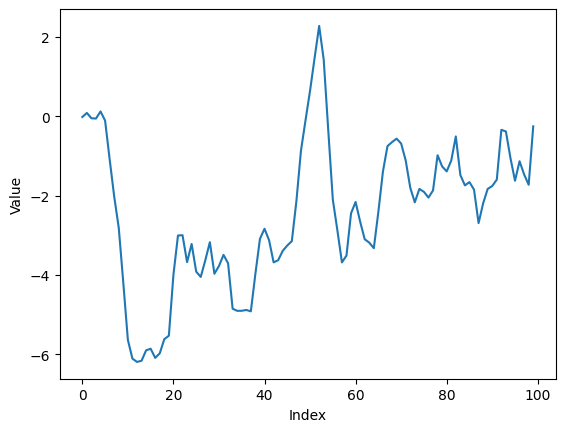


[INFO] seq_iter = 18
[INFO] cps_pred: [ 3 17 29 52 70 77 85 93]


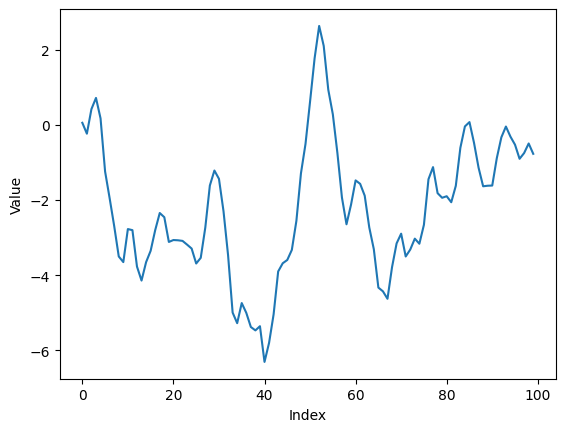


[INFO] seq_iter = 19
[INFO] cps_pred: [ 3 30 52 67 79 84 92 98]


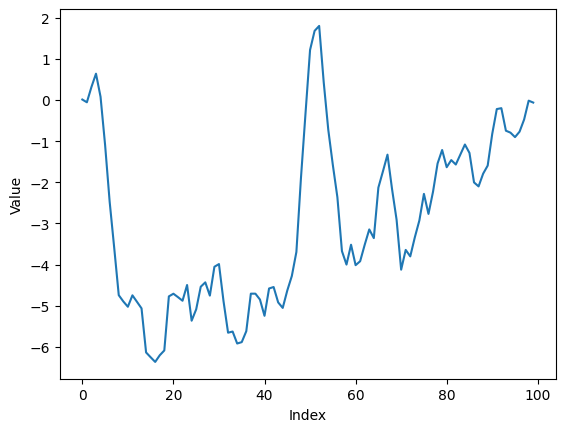


[INFO] seq_iter = 20
[INFO] cps_pred: [ 2 24 36 51 59 67 78 84 98]


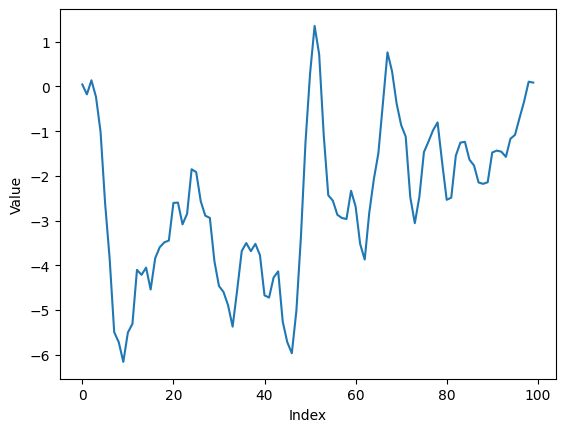


[INFO] seq_iter = 21
[INFO] cps_pred: [34 41 51 58 72 83 91]


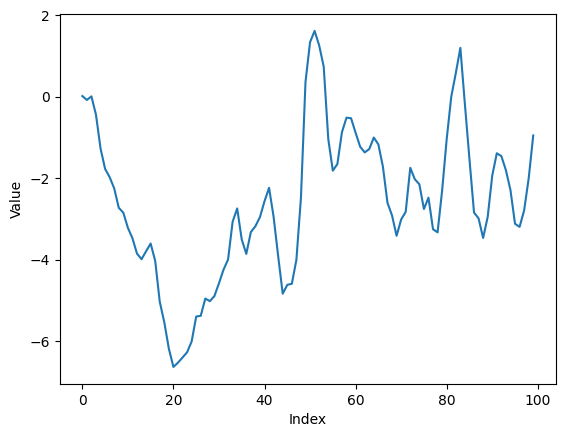


[INFO] seq_iter = 22
[INFO] cps_pred: [ 2 12 28 36 42 50 59 67 79 90 98]


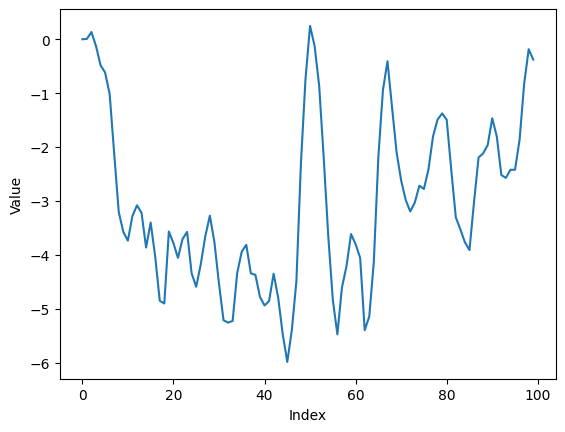


[INFO] seq_iter = 23
[INFO] cps_pred: [ 2 10 23 43 51 68 76 85]


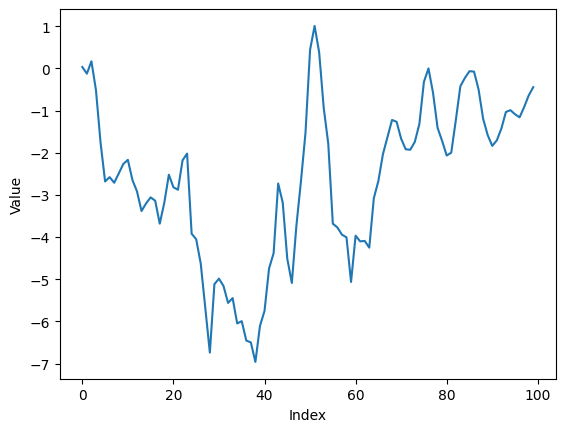


[INFO] seq_iter = 24
[INFO] cps_pred: [ 4 22 35 42 49 69 80 89]


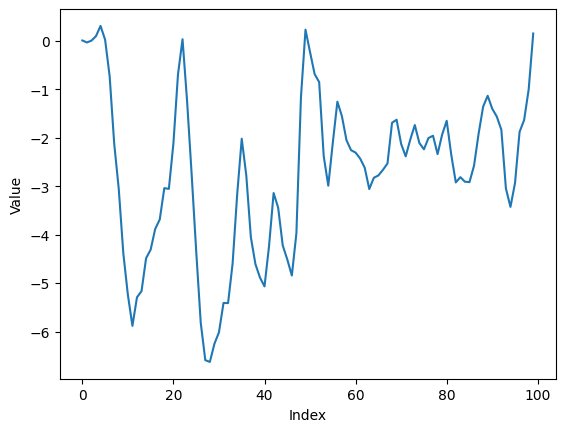


[INFO] seq_iter = 25
[INFO] cps_pred: [ 3 15 24 38 50 64 74 85 91 98]


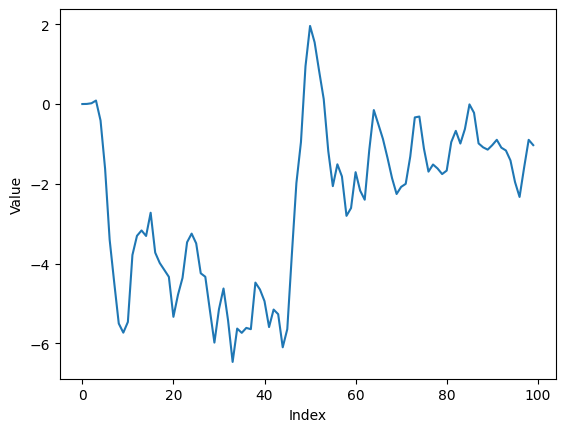


[INFO] seq_iter = 26
[INFO] cps_pred: [23 36 52 65 75 83 98]


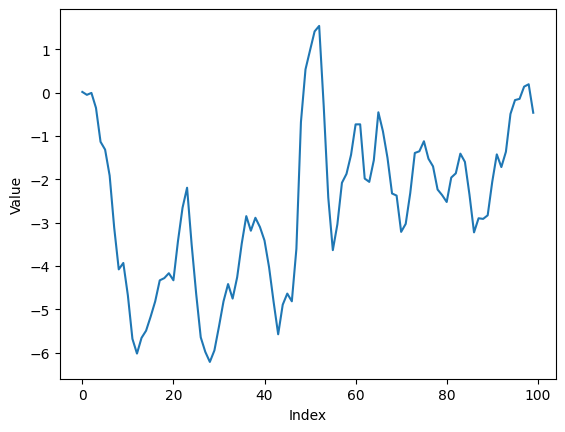


[INFO] seq_iter = 27
[INFO] cps_pred: [ 2 21 27 52 59 72 80 85]


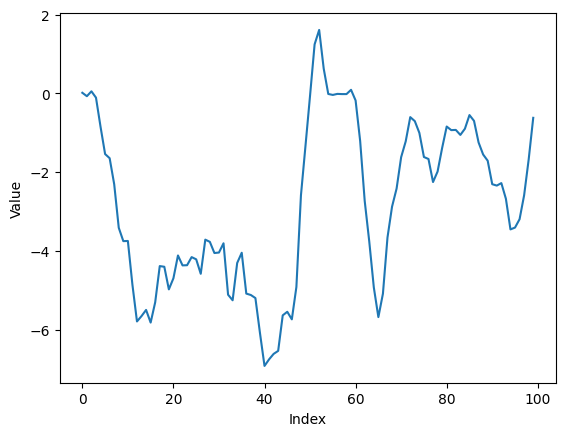


[INFO] seq_iter = 28
[INFO] cps_pred: [ 2 22 37 57 68 76 84]


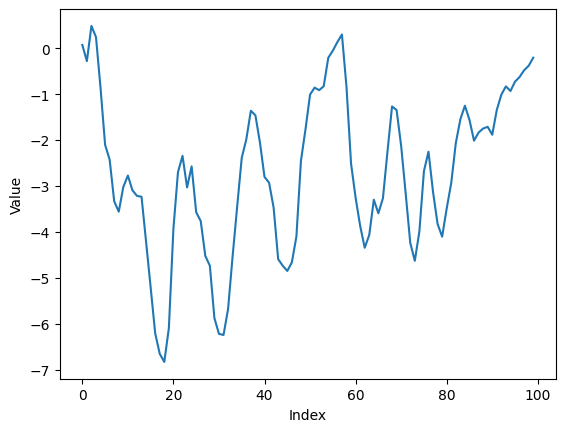


[INFO] seq_iter = 29
[INFO] cps_pred: [ 3 13 26 43 51 63 77 93]


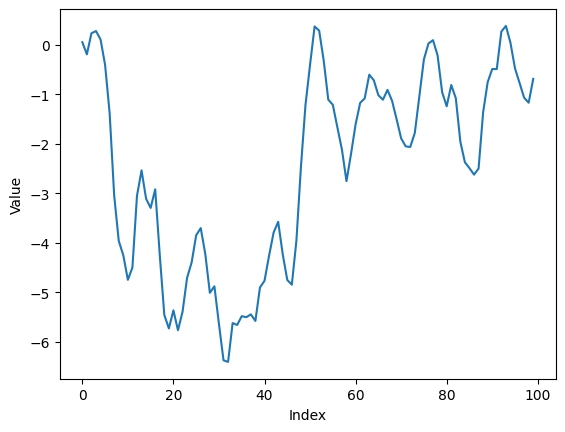


[INFO] seq_iter = 30
[INFO] cps_pred: [ 2 17 28 36 52 61 73 88]


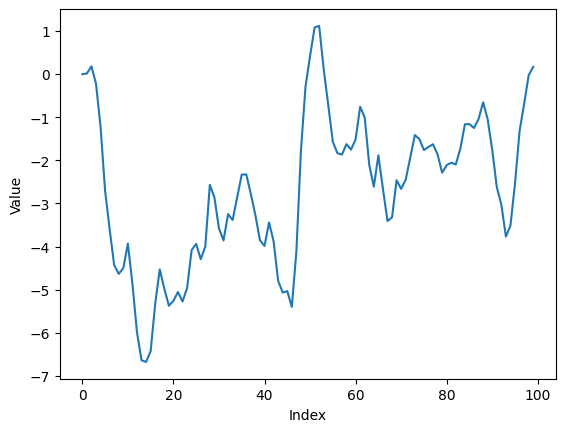


[INFO] seq_iter = 31
[INFO] cps_pred: [ 1 10 33 52 66 80 87]


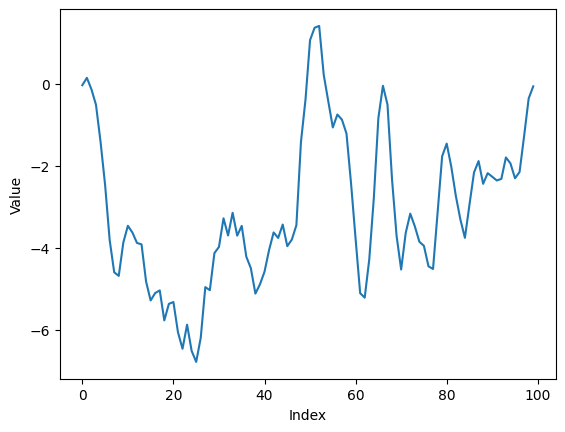


[INFO] seq_iter = 32
[INFO] cps_pred: [ 2 15 30 38 52 64 71 80 88]


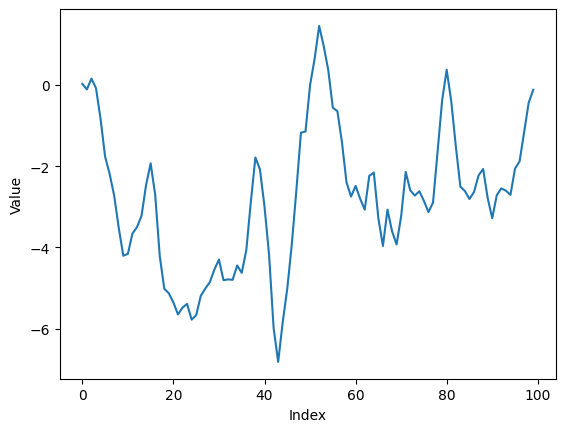


[INFO] seq_iter = 33
[INFO] cps_pred: [ 2 12 26 36 51 61 74 85 98]


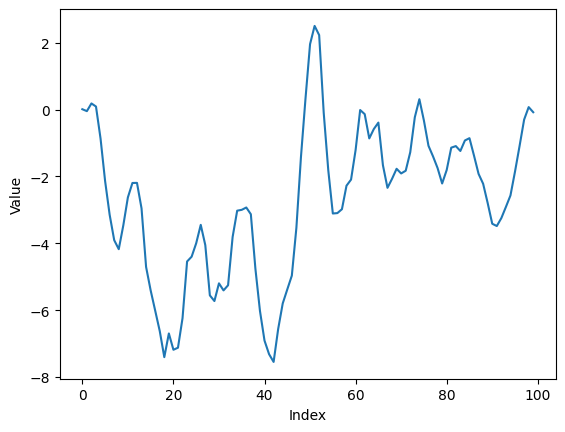


[INFO] seq_iter = 34
[INFO] cps_pred: [ 3 24 34 51 59 67 80 93]


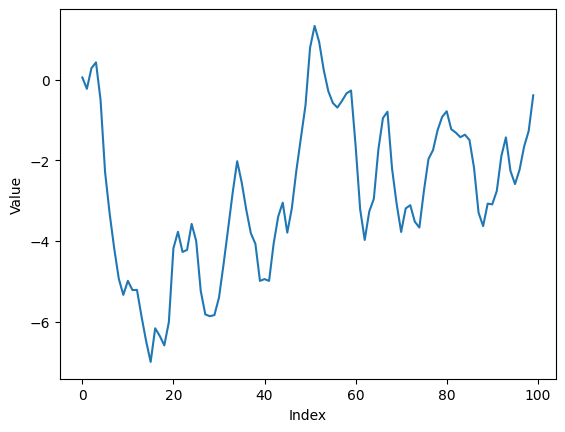


[INFO] seq_iter = 35
[INFO] cps_pred: [ 2 20 32 52 64 72 81 91]


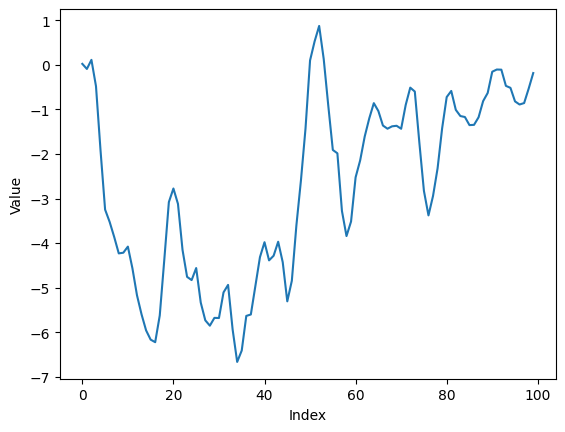


[INFO] seq_iter = 36
[INFO] cps_pred: [ 2 17 25 51 58 76 84]


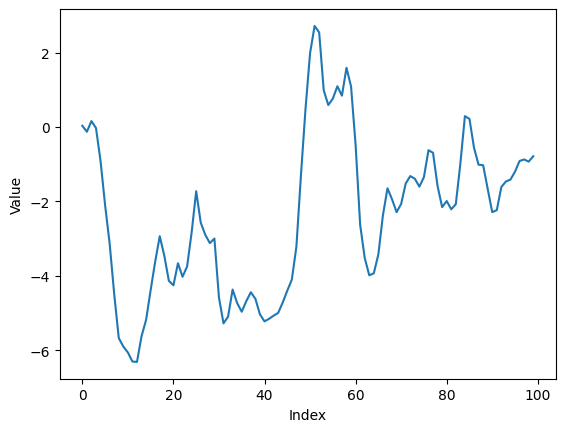


[INFO] seq_iter = 37
[INFO] cps_pred: [13 28 39 51 62 68 80 86 96]


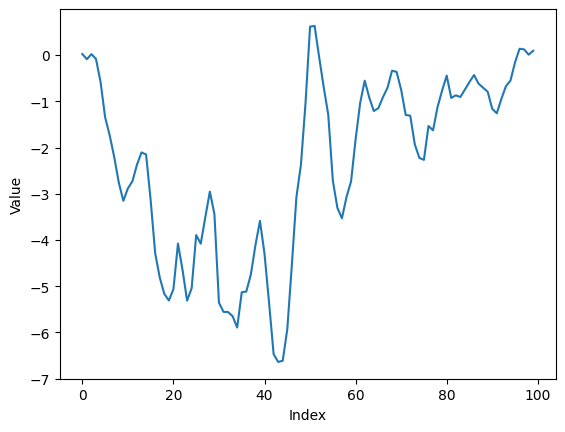


[INFO] seq_iter = 38
[INFO] cps_pred: [ 1 31 48 73 88 96]


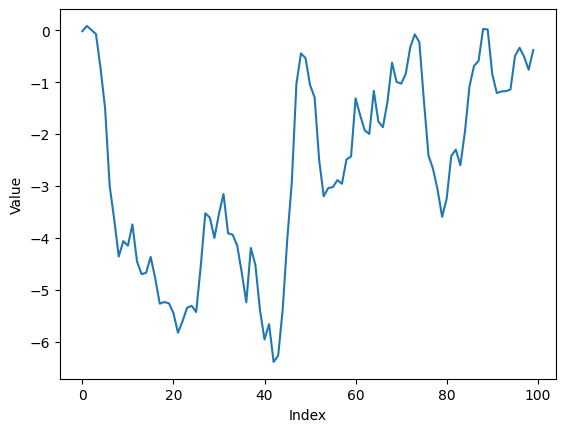


[INFO] seq_iter = 39
[INFO] cps_pred: [ 3 15 35 50 61 83]


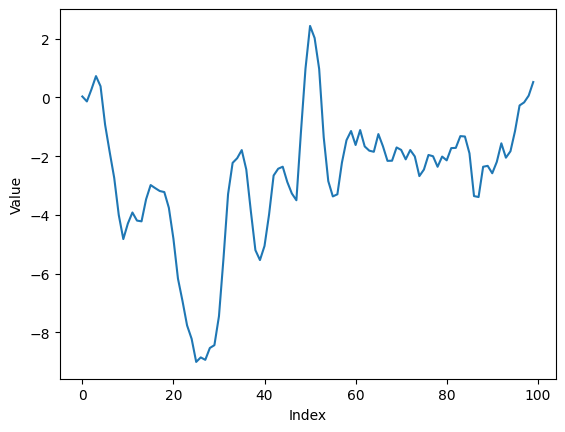


[INFO] seq_iter = 40
[INFO] cps_pred: [ 3 11 18 26 37 52 68 80 98]


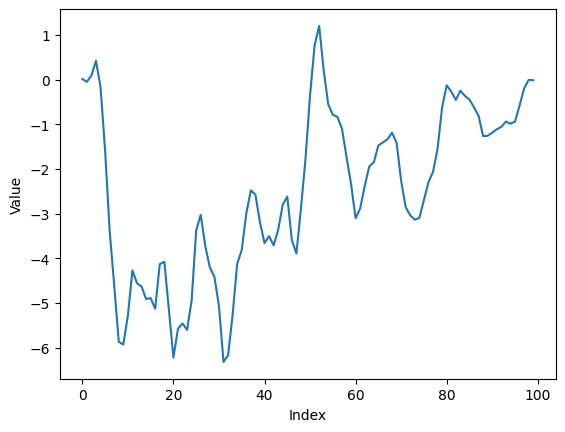


[INFO] seq_iter = 41
[INFO] cps_pred: [14 25 41 50 72 83 89 98]


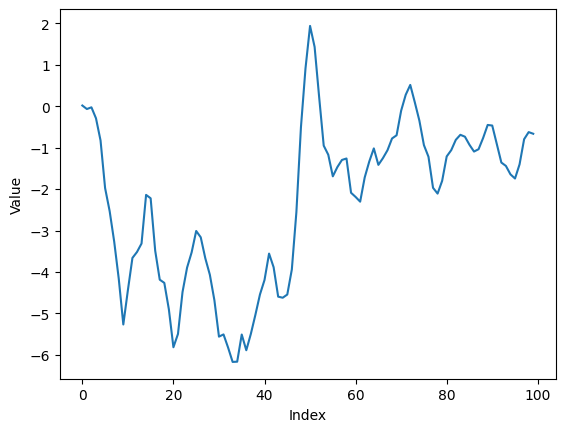


[INFO] seq_iter = 42
[INFO] cps_pred: [ 2 22 31 55 63 70 77 86]


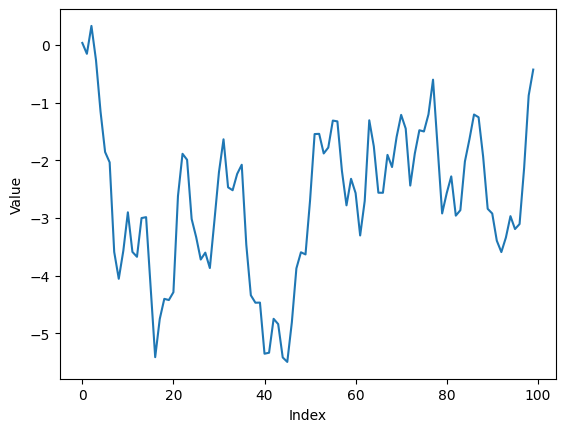


[INFO] seq_iter = 43
[INFO] cps_pred: [ 1 18 27 45 55 64 78 85]


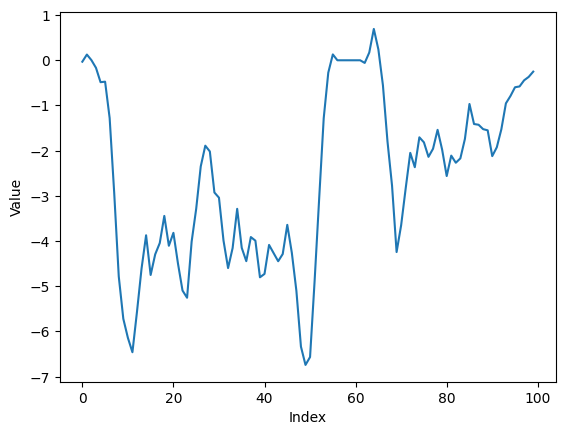


[INFO] seq_iter = 44
[INFO] cps_pred: [ 3 10 37 55 68 79 97]


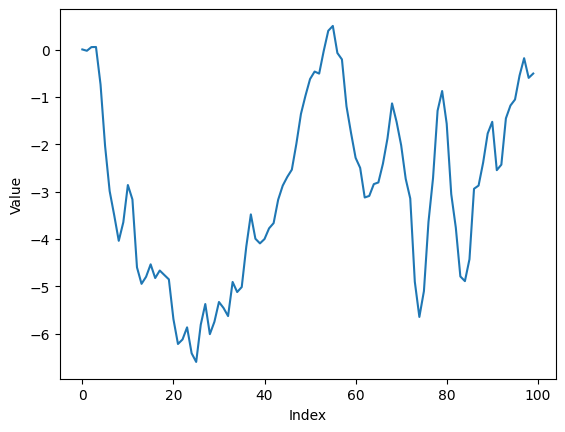


[INFO] seq_iter = 45
[INFO] cps_pred: [23 36 51 58 65 86]


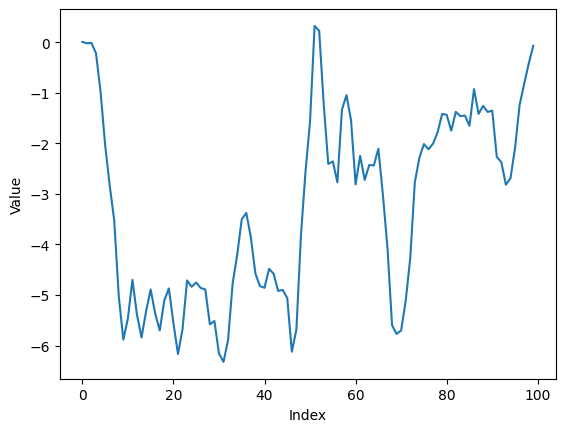


[INFO] seq_iter = 46
[INFO] cps_pred: [ 2 15 22 35 51 61 70 81 93]


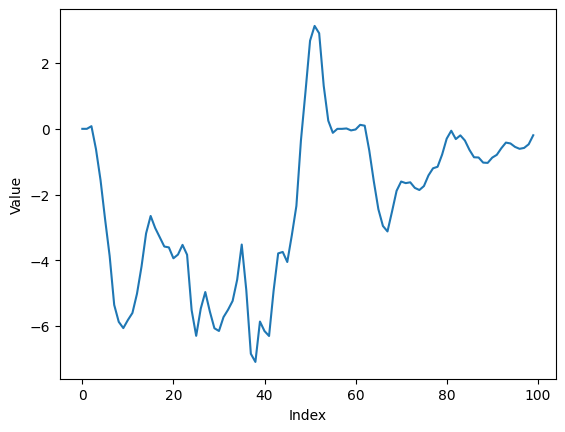


[INFO] seq_iter = 47
[INFO] cps_pred: [ 1 11 27 37 51 71]


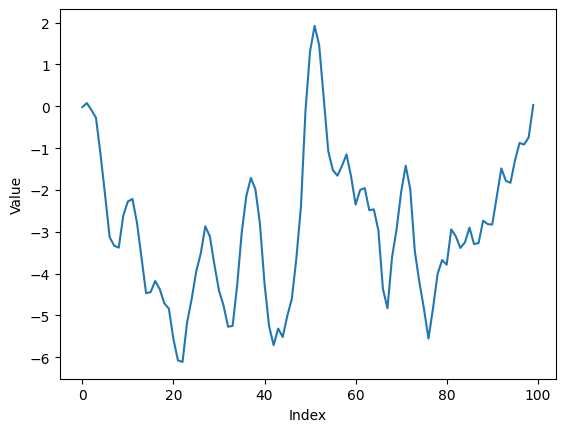


[INFO] seq_iter = 48
[INFO] cps_pred: [ 2 30 41 51 72 80]


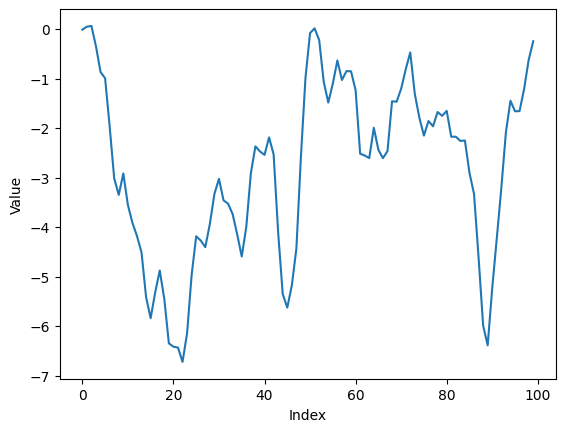


[INFO] seq_iter = 49
[INFO] cps_pred: [ 1 20 28 51 61 71 92]


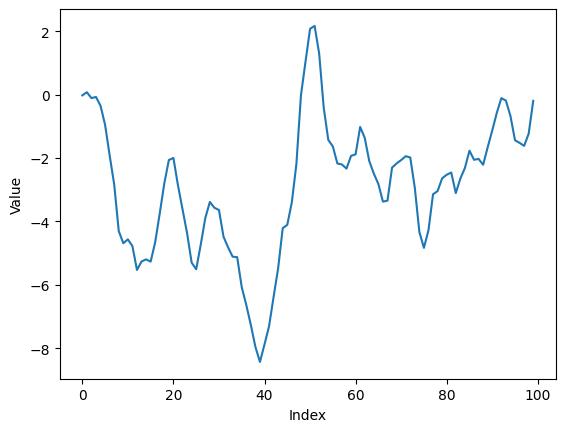

In [30]:


CP_holder = []

for seq_iter in range(50):

    print("\n[INFO] seq_iter =", seq_iter)
    X = data_full['y_list'][seq_iter]

    cpd = OnlineNNClassifier(periods=1, window_size=3, lag_size=1, step=1,
                         n_epochs=10, lr=0.01, lam=0.0001, optimizer="Adam")
    score, cps_pred = cpd.predict(X)
    print("[INFO] cps_pred:",cps_pred)
    #print("[INFO] score:",score)

    plt.plot(score)
    plt.xlabel("Index"); plt.ylabel("Value")
    plt.show()

    #indices = np.where(np.abs(score) > C_by_quantile)[0]
    #print("[INFO] indices:",indices)
    #CP_holder.append(indices[0].item())
    #print("[INFO] CP_holder",CP_holder)


    #df = pd.DataFrame(CP_holder, columns=['CP'])
    #df.to_csv('data/CP_roerich_{}_d{}.csv'.format(data_use, dim_d), index=False)

